### 1. Import Required Libraries

In [182]:
import pandas as pd
import numpy as np
from functools import reduce
import explore as exp
import model as modelling
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder,PolynomialFeatures
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error,classification_report,roc_curve,plot_roc_curve,plot_confusion_matrix
from sklearn.model_selection import RandomizedSearchCV,train_test_split
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
import shap
from sklearn.linear_model import LogisticRegression
#from lightgbm import LGBMClassifier

### 2. Load Data Files

In [183]:
# load all data files
relative_path = '../data/'
extension = '.csv'
file_names = ['chefmozaccepts','chefmozcuisine','chefmozhours4','chefmozparking','geoplaces2','usercuisine','userpayment','userprofile','Rating_Final_RECODED']
file_labels = ['place_payment','place_cuisine','place_openhours','place_parking','place_profile','user_cuisine','user_payment','user_profile','ratings']
missing_values = ['?']
dict_data = {}
for file,label in zip(file_names,file_labels):
    dict_kv = {label : pd.read_csv(f'{relative_path}{file}{extension}',encoding ='latin-1', na_values = missing_values)}
    dict_data.update(dict_kv)    
dict_data

{'place_payment':       placeID             Rpayment
 0      135110                 cash
 1      135110                 VISA
 2      135110  MasterCard-Eurocard
 3      135110     American_Express
 4      135110     bank_debit_cards
 5      135109                 cash
 6      135107                 cash
 7      135107                 VISA
 8      135107  MasterCard-Eurocard
 9      135107     American_Express
 10     135107     bank_debit_cards
 11     135106                 cash
 12     135106                 VISA
 13     135106  MasterCard-Eurocard
 14     135105                 cash
 15     135104                 cash
 16     135104                 VISA
 17     135104  MasterCard-Eurocard
 18     135103                 cash
 19     135103                 VISA
 20     135103  MasterCard-Eurocard
 21     135102                 cash
 22     135102                 VISA
 23     135102  MasterCard-Eurocard
 24     135102     bank_debit_cards
 25     135101                 cash
 26     135

### 3. Preprocess Data and Initital Exploration

Rpayment  Place_American_Express  Place_Carte_Blanche  Place_Diners_Club  \
placeID                                                                    
132002                       1.0                  0.0                1.0   
132012                       1.0                  0.0                1.0   
132019                       1.0                  0.0                1.0   
132023                       1.0                  0.0                1.0   
132024                       1.0                  0.0                1.0   
132026                       1.0                  0.0                1.0   
132030                       1.0                  0.0                1.0   
132031                       0.0                  0.0                0.0   
132103                       1.0                  0.0                0.0   
132106                       1.0                  0.0                1.0   
132107                       1.0                  0.0                1.0   
132109                       1.0                  0.0                0.0   
132111                       1.0                  0.0                1.0   
132115                       1.0                  0.0                0.0   
132116                       1.0                  0.0                0.0   
132130                       0.0                  0.0                0.0   
132155                       0.0                  0.0                0.0   
132159                       1.0                  0.0                1.0   
132160                       0.0                  0.0                0.0   
132161                       0.0                  0.0                0.0   
132163                       0.0                  0.0                0.0   
132164                       1.0                  0.0                0.0   
132165                       1.0                  0.0                0.0   
132166                       0.0                  0.0                0.0   
132177                       0.0                  0.0                0.0   
132182                       1.0                  0.0                0.0   
132184                       0.0                  0.0                0.0   
132187                       1.0                  1.0                1.0   
132201                       0.0                  0.0                0.0   
132204                       1.0                  0.0                0.0   
132206                       1.0                  0.0                0.0   
132207                       0.0                  0.0                0.0   
132211                       1.0                  0.0                1.0   
132212                       1.0                  0.0                1.0   
132213                       1.0                  0.0                1.0   
132215                       0.0                  0.0                0.0   
132220                       0.0                  0.0                0.0   
132221                       1.0                  0.0                0.0   
132228                       0.0                  0.0                0.0   
132229                       1.0                  0.0                0.0   
132230                       1.0                  0.0                0.0   
132231                       1.0                  1.0                1.0   
132232                       0.0                  0.0                0.0   
132233                       0.0                  0.0                0.0   
132237                       0.0                  0.0                0.0   
132243                       1.0                  1.0                1.0   
132244                       1.0                  0.0                1.0   
132246                       0.0                  0.0                0.0   
132275                       1.0                  0.0                0.0   
132289                       1.0                  1.0                1.0   
132293                       1.0                

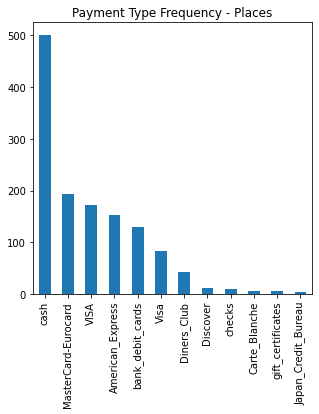

In [184]:
#analyse and process place_payment
dict_data['place_payment']['Rpayment'].value_counts().plot.bar(title="Payment Type Frequency - Places")
df_place_payment = pd.pivot_table(dict_data['place_payment'].drop_duplicates(),index=['placeID'],columns=['Rpayment'] ,aggfunc=len).fillna(0)
dict_data['place_payment']['Rpayment'].value_counts(normalize=True).cumsum()
df_place_payment = df_place_payment.add_prefix('Place_')
df_place_payment

Rcuisine  Place_Afghan  Place_African  Place_American  Place_Armenian  \
placeID                                                                 
132001             0.0            0.0             0.0             0.0   
132002             0.0            0.0             0.0             0.0   
132003             0.0            0.0             0.0             0.0   
132004             0.0            0.0             0.0             0.0   
132005             0.0            0.0             0.0             0.0   
132006             0.0            0.0             0.0             0.0   
132007             0.0            0.0             0.0             0.0   
132008             0.0            0.0             0.0             0.0   
132009             0.0            0.0             0.0             0.0   
132010             0.0            0.0             0.0             0.0   
132012             0.0            0.0             0.0             0.0   
132013             0.0            0.0             0.0             0.0   
132014             0.0            0.0             0.0             0.0   
132015             0.0            0.0             0.0             0.0   
132016             0.0            0.0             0.0             0.0   
132017             0.0            0.0             0.0             0.0   
132018             0.0            0.0             0.0             0.0   
132019             0.0            0.0             0.0             0.0   
132020             0.0            0.0             0.0             0.0   
132021             0.0            0.0             0.0             0.0   
132022             0.0            0.0             0.0             0.0   
132023             0.0            0.0             0.0             0.0   
132024             0.0            0.0             0.0             0.0   
132025             0.0            0.0             0.0             0.0   
132026             0.0            0.0             0.0             0.0   
132028             0.0            0.0             0.0             0.0   
132030             0.0            0.0             0.0             0.0   
132031             0.0            0.0             0.0             0.0   
132083             0.0            0.0             0.0             0.0   
132087             0.0            0.0             0.0             0.0   
132092             0.0            0.0             0.0             0.0   
132094             0.0            0.0             0.0             0.0   
132096             0.0            0.0             0.0             0.0   
132097             0.0            0.0             0.0             0.0   
132098             0.0            0.0             0.0             0.0   
132100             0.0            0.0             1.0             0.0   
132101             0.0            0.0             1.0             0.0   
132102             0.0            0.0             0.0             0.0   
132103             0.0            0.0             0.0             0.0   
132105             0.0            0.0             0.0             0.0   
132106             0.0            0.0             0.0             0.0   
132107             0.0            0.0             0.0             0.0   
132108             0.0            0.0             0.0             0.0   
132109             0.0            0.0             0.0             0.0   
132114             0.0            0.0             0.0             0.0   
132115             0.0            0.0             0.0             0.0   
132116             0.0            0.0             0.0             0.0   
132118             0.0            0.0             0.0             0.0   
132119             0.0            0.0             0.0             0.0   
132120             0.0            0.0             0.0             0.0   
132121             0.0            0.0             0.0             0.0   
132125             0.0            0.0             0.0             0.0   
132126             0.0            0.0             0.0     

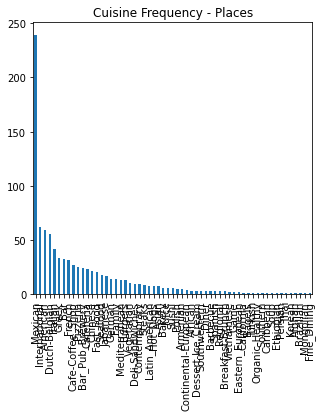

In [185]:
# analyse and process place_cuisine
dict_data['place_cuisine']['Rcuisine'].value_counts().plot.bar(title="Cuisine Frequency - Places")
df_place_cuisine= pd.pivot_table(dict_data['place_cuisine'].drop_duplicates(),index=['placeID'],columns=['Rcuisine'] ,aggfunc=len).fillna(0)
dict_data['place_cuisine']['Rcuisine'].value_counts(normalize=True).cumsum()
df_place_cuisine = df_place_cuisine.add_prefix('Place_')
df_place_cuisine



Place_WeekDay  Place_Sat  Place_Sun
placeID                                     
132012             1.0        1.0        1.0
132023             1.0        1.0        1.0
132024             1.0        1.0        1.0
132026             1.0        0.0        0.0
132030             1.0        1.0        1.0
132097             1.0        1.0        1.0
132103             1.0        0.0        1.0
132107             1.0        1.0        1.0
132108             1.0        1.0        1.0
132109             1.0        1.0        1.0
132111             1.0        1.0        1.0
132115             1.0        1.0        1.0
132116             1.0        1.0        1.0
132118             1.0        1.0        1.0
132120             1.0        1.0        1.0
132130             1.0        1.0        1.0
132148             2.0        2.0        1.0
132155             1.0        1.0        1.0
132157             1.0        1.0        1.0
132159             1.0        1.0        1.0
132160             1.0        1.0        1.0
132161             1.0        1.0        1.0
132163             1.0        1.0        1.0
132164             1.0        1.0        1.0
132165             1.0        1.0        1.0
132186             0.0        1.0        1.0
132187             1.0        1.0        1.0
132204             1.0        1.0        1.0
132206             1.0        1.0        1.0
132207             1.0        1.0        1.0
132216             1.0        1.0        1.0
132220             1.0        1.0        0.0
132221             1.0        1.0        0.0
132226             1.0        1.0        1.0
132229             1.0        1.0        1.0
132231             1.0        1.0        1.0
132237             1.0        1.0        1.0
132243             1.0        1.0        0.0
132244             1.0        1.0        0.0
132250             1.0        1.0        1.0
132255             1.0        1.0        1.0
132258             1.0        1.0        0.0
132265             1.0        1.0        1.0
132266             1.0        1.0        1.0
132273             1.0        1.0        1.0
132275             2.0        1.0        1.0
132284             1.0        1.0        1.0
132297             1.0        1.0        1.0
132301             1.0        1.0        1.0
132302             1.0        1.0        1.0
132310             1.0        1.0        1.0
132317             1.0        1.0        1.0
132318             1.0        1.0        1.0
132319             1.0        1.0        1.0
132353             1.0        1.0        1.0
132355             1.0        1.0        1.0
132361             1.0        1.0        1.0
132364             1.0        1.0        1.0
132372             1.0        1.0        1.0
132395             0.0        1.0        1.0
132396             1.0        1.0        1.0
132399             1.0        1.0        1.0
132407             1.0        1.0        1.0
132409             1.0        0.0        0.0
132421             1.0        1.0        1.0
132436             1.0        1.0        1.0
132437             1.0        1.0        1.0
132438             1.0        1.0        1.0
132439             1.0        1.0        1.0
132443             1.0        1.0        1.0
132446             1.0        1.0        0.0
132447             1.0        1.0        1.0
132449             1.0        1.0        1.0
132468             1.0        1.0        1.0
132469             1.0        1.0        1.0
132474             1.0        1.0        1.0
132477             1.0        1.0        1.0
132478             1.0        1.0        0.0
132479             1.0        1.0        1.0
132481             1.0        1.0        1.0
132482             1.0        1.0        1.0
132483             1.0        1.0        1.0
132491             2.0        1.0        0.0
132498             2.0        2.0        2.0
132518             1.0        0.0        0.0
132521             1.0        1.0        1.0
132527             1.0        1.0        1.0
1325

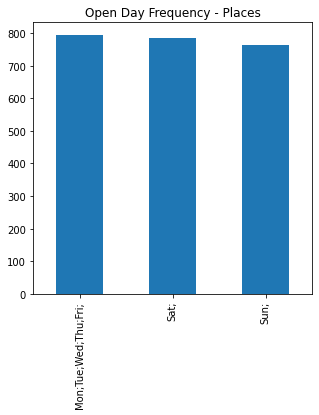

In [186]:
# analyse and process open_hours
dict_data['place_openhours']['days'].value_counts().plot.bar(title="Open Day Frequency - Places")
df_place_openhours= pd.pivot_table(dict_data['place_openhours'].drop_duplicates(),index=['placeID'],columns=['days'] ,aggfunc=len).fillna(0)
df_place_openhours.columns  = ['WeekDay','Sat','Sun']
df_place_openhours = df_place_openhours.add_prefix('Place_')
df_place_openhours

parking_lot  Place_fee  Place_none  Place_public  Place_street  \
placeID                                                          
132012             0.0         0.0           1.0           1.0   
132023             1.0         0.0           1.0           0.0   
132024             0.0         0.0           0.0           1.0   
132026             1.0         0.0           0.0           0.0   
132030             0.0         0.0           0.0           1.0   
132031             0.0         0.0           0.0           1.0   
132107             0.0         0.0           1.0           0.0   
132111             0.0         0.0           1.0           0.0   
132155             1.0         0.0           1.0           0.0   
132157             0.0         0.0           0.0           0.0   
132159             0.0         0.0           0.0           1.0   
132160             0.0         0.0           0.0           1.0   
132161             0.0         0.0           0.0           1.0   
132164             1.0         0.0           0.0           0.0   
132177             0.0         0.0           0.0           0.0   
132182             0.0         0.0           0.0           0.0   
132184             0.0         0.0           0.0           1.0   
132204             0.0         0.0           1.0           1.0   
132206             1.0         0.0           0.0           0.0   
132207             0.0         0.0           0.0           1.0   
132220             1.0         0.0           0.0           0.0   
132231             0.0         0.0           0.0           1.0   
132237             0.0         0.0           0.0           0.0   
132243             0.0         0.0           1.0           0.0   
132281             0.0         0.0           1.0           1.0   
132289             0.0         0.0           0.0           0.0   
132292             0.0         0.0           1.0           1.0   
132296             0.0         0.0           0.0           1.0   
132297             0.0         0.0           1.0           1.0   
132302             0.0         0.0           0.0           0.0   
132326             0.0         0.0           1.0           0.0   
132333             0.0         0.0           0.0           0.0   
132355             1.0         0.0           0.0           1.0   
132377             0.0         0.0           0.0           1.0   
132392             0.0         0.0           0.0           1.0   
132396             1.0         0.0           1.0           0.0   
132399             1.0         0.0           1.0           0.0   
132409             0.0         0.0           1.0           1.0   
132436             0.0         0.0           0.0           1.0   
132437             1.0         0.0           0.0           0.0   
132439             0.0         0.0           0.0           1.0   
132442             0.0         0.0           0.0           1.0   
132443             0.0         0.0           0.0           1.0   
132449             0.0         0.0           1.0           1.0   
132468             0.0         1.0           0.0           0.0   
132478             1.0         1.0           0.0           0.0   
132479             0.0         0.0           0.0           1.0   
132481             1.0         0.0           0.0           1.0   
132482             0.0         0.0           0.0           0.0   
132483             1.0         0.0           1.0           0.0   
132484             0.0         0.0           0.0           0.0   
132487             0.0         0.0           0.0           0.0   
132491             0.0         0.0           1.0           1.0   
132521             1.0         0.0           1.0           0.0   
132527             0.0         0.0           0.0           1.0   
132530             1.0         0.0           1.0           0.0   
132531             0.0         0.0           1.0           1.0   
132535             0.0         0.0           0.0           1.0   
132545             0.0         0.0      

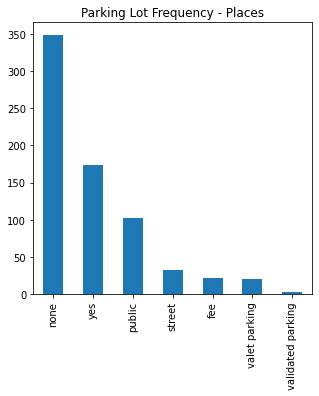

In [187]:
# analyse and process place_parking
dict_data['place_parking']['parking_lot'].value_counts().plot.bar(title="Parking Lot Frequency - Places")
df_place_parking= pd.pivot_table(dict_data['place_parking'].drop_duplicates(),index=['placeID'],columns=['parking_lot'] ,aggfunc=len).fillna(0)
dict_data['place_parking']['parking_lot'].value_counts(normalize=True).cumsum()
df_place_parking = df_place_parking.add_prefix('Place_')
df_place_parking


In [188]:
#process place profile
df_place_profile = dict_data['place_profile'].add_prefix('Place_')
df_place_profile.rename(columns={"Place_placeID": "placeID"},inplace=True)
df_place_profile

placeID  Place_latitude  Place_longitude  \
0     134999       18.915421       -99.184871   
1     132825       22.147392      -100.983092   
2     135106       22.149709      -100.976093   
3     132667       23.752697       -99.163359   
4     132613       23.752903       -99.165076   
5     135040       22.135617      -100.969709   
6     132732       23.754357       -99.171288   
7     132875       22.149901      -100.993779   
8     132609       23.760268       -99.165865   
9     135082       22.151448      -100.915099   
10    135070       22.152918      -100.915164   
11    135069       22.140129      -100.944872   
12    135065       22.149580      -100.999557   
13    135076       22.181017      -100.973614   
14    135086       22.141421      -101.013955   
15    132870       22.143078      -100.935479   
16    132854       22.137863      -100.938327   
17    132937       22.150019      -100.979920   
18    132856       22.151378      -100.974634   
19    132668       23.738212       -99.151955   
20    135033       22.141610      -100.973142   
21    132862       22.150643      -100.987015   
22    134983       18.948657       -99.235361   
23    132851       22.136872      -100.934574   
24    135013       18.917441       -99.165945   
25    135042       22.159357      -100.973411   
26    132768       18.925773       -99.232636   
27    132561       23.726819       -99.126506   
28    135045       22.151189      -100.981790   
29    132847       22.144337      -100.937382   
30    135054       22.140626      -100.915657   
31    134975       18.940828       -99.215426   
32    135053       22.178931      -101.012861   
33    135050       22.174887      -100.970825   
34    135025       22.149550      -100.977970   
35    135030       22.147880      -100.989472   
36    135057       22.145992      -100.955118   
37    135079       22.156376      -100.998355   
38    134992       18.936683       -99.247366   
39    132954       22.160381      -100.988045   
40    135041       22.151060      -100.977659   
41    132608       23.758805       -99.165130   
42    135046       22.141282      -101.002958   
43    132564       23.730925       -99.145185   
44    132869       22.141238      -100.923925   
45    132925       22.153500      -100.976243   
46    132955       22.147622      -101.010275   
47    135059       22.145108      -100.989547   
48    135001       18.941859       -99.241927   
49    135063       22.156724      -100.975556   
50    135080       22.145008      -100.997969   
51    135000       18.870565       -99.226938   
52    135066       22.168350      -100.972466   
53    135034       22.140517      -101.021422   
54    135060       22.156883      -100.978485   
55    135055       22.148854      -101.008472   
56    135108       22.136253      -100.933585   
57    135074       22.149689      -100.999525   
58    135018       18.859803       -99.222164   
59    135064       22.154687      -100.996617   
60    135038       22.155651      -100.977767   
61    135081       22.164842      -100.960493   
62    132723       22.148934      -101.019845   
63    135051       22.151189      -100.977058   
64    135021       18.933537       -99.222497   
65    135052       22.150981      -100.977412   
66    132845       22.126293      -100.900776   
67    135011       18.910610       -99.169539   
68    132858       22.131292      -100.937194   
69    135026       22.148665      -101.001273   
70    132884       22.139578      -101.027886   
71    135016       18.869347       -99.209944   
72    135104       23.752982       -99.168434   
73    132630       23.752931       -99.164473   
74    135047       22.150921      -100.993828   
75    132951       22.154474      -100.985809   
76    132665       23.736798       -99.134241   
77    135044       22.141848      -100.997475   
78    135035       22.145813      -101.018032   
79    135071       22.126375      -100.910926   
80    132834       22.156469      -1

Rcuisine  User_Afghan  User_African  User_American  User_Armenian  User_Asian  \
userID                                                                          
U1001             0.0           0.0            1.0            0.0         0.0   
U1002             0.0           0.0            0.0            0.0         0.0   
U1003             0.0           0.0            0.0            0.0         0.0   
U1004             0.0           0.0            0.0            0.0         0.0   
U1005             0.0           0.0            1.0            0.0         0.0   
U1006             0.0           0.0            0.0            0.0         0.0   
U1007             0.0           0.0            0.0            0.0         0.0   
U1008             0.0           0.0            1.0            0.0         0.0   
U1009             0.0           0.0            0.0            0.0         0.0   
U1010             0.0           0.0            0.0            0.0         0.0   
U1011             0.0           0.0            0.0            0.0         0.0   
U1012             0.0           0.0            0.0            0.0         0.0   
U1013             0.0           0.0            0.0            0.0         0.0   
U1014             0.0           0.0            0.0            0.0         0.0   
U1015             0.0           0.0            0.0            0.0         0.0   
U1016             0.0           0.0            1.0            0.0         0.0   
U1017             0.0           0.0            0.0            0.0         0.0   
U1018             0.0           0.0            0.0            0.0         0.0   
U1019             0.0           0.0            0.0            0.0         0.0   
U1020             0.0           0.0            0.0            0.0         0.0   
U1021             0.0           0.0            0.0            0.0         0.0   
U1022             0.0           0.0            0.0            0.0         0.0   
U1023             0.0           0.0            0.0            0.0         0.0   
U1024             1.0           0.0            0.0            0.0         0.0   
U1025             0.0           0.0            0.0            0.0         0.0   
U1026             0.0           0.0            0.0            0.0         0.0   
U1027             0.0           0.0            0.0            0.0         0.0   
U1028             0.0           0.0            0.0            0.0         0.0   
U1029             0.0           0.0            0.0            0.0         0.0   
U1030             0.0           0.0            0.0            0.0         0.0   
U1031             0.0           0.0            0.0            0.0         0.0   
U1032             0.0           0.0            0.0            0.0         0.0   
U1033             0.0           0.0            0.0            0.0         0.0   
U1034             0.0           0.0            0.0            0.0         0.0   
U1035             0.0           0.0            0.0            0.0         0.0   
U1036             0.0           0.0            0.0            0.0         0.0   
U1037             0.0           0.0            0.0            0.0         0.0   
U1038             0.0           0.0            0.0            0.0         0.0   
U1039             0.0           0.0            0.0            0.0         0.0   
U1040             0.0           0.0            0.0            0.0         0.0   
U1041             0.0           0.0            0.0            0.0         0.0   
U1042             0.0           0.0            0.0            0.0         0.0   
U1043             0.0           0.0            0.0            0.0         0.0   
U1044             0.0           0.0            0.0            0.0         0.0   
U1045             0.0           0.0            0.0            0.0         0.0   
U1046             0.0           0.0            0.0            0.0         0.0   
U1047             0.0           0.0            1.0            0.0         0.0   
U1048             0.0          

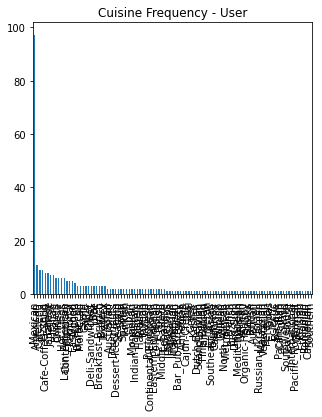

In [189]:
# analyse and process user_cuisine
dict_data['user_cuisine']['Rcuisine'].value_counts().plot.bar(title="Cuisine Frequency - User")
df_user_cuisine= pd.pivot_table(dict_data['user_cuisine'].drop_duplicates(),index=['userID'],columns=['Rcuisine'] ,aggfunc=len).fillna(0)
dict_data['user_cuisine']['Rcuisine'].value_counts(normalize=True).cumsum()
df_user_cuisine = df_user_cuisine.add_prefix('User_')
df_user_cuisine

Upayment  User_American_Express  User_MasterCard-Eurocard  User_VISA  \
userID                                                                 
U1001                       0.0                       0.0        0.0   
U1002                       0.0                       0.0        0.0   
U1003                       0.0                       0.0        0.0   
U1004                       0.0                       0.0        0.0   
U1005                       0.0                       0.0        0.0   
U1006                       0.0                       0.0        0.0   
U1007                       0.0                       0.0        0.0   
U1008                       0.0                       0.0        0.0   
U1009                       0.0                       0.0        0.0   
U1010                       0.0                       0.0        0.0   
U1011                       0.0                       0.0        0.0   
U1012                       0.0                       0.0        0.0   
U1013                       0.0                       1.0        0.0   
U1014                       0.0                       0.0        0.0   
U1015                       0.0                       0.0        0.0   
U1016                       0.0                       0.0        0.0   
U1017                       0.0                       0.0        1.0   
U1018                       0.0                       0.0        0.0   
U1019                       0.0                       0.0        0.0   
U1020                       0.0                       0.0        0.0   
U1021                       0.0                       0.0        0.0   
U1022                       0.0                       0.0        0.0   
U1023                       0.0                       0.0        0.0   
U1026                       0.0                       0.0        0.0   
U1027                       0.0                       0.0        0.0   
U1028                       0.0                       0.0        0.0   
U1029                       0.0                       0.0        0.0   
U1030                       0.0                       0.0        0.0   
U1031                       1.0                       0.0        0.0   
U1032                       0.0                       0.0        0.0   
U1033                       0.0                       0.0        0.0   
U1034                       0.0                       0.0        0.0   
U1035                       0.0                       0.0        1.0   
U1036                       0.0                       0.0        0.0   
U1037                       0.0                       0.0        0.0   
U1038                       0.0                       0.0        0.0   
U1039                       0.0                       0.0        0.0   
U1040                       0.0                       0.0        0.0   
U1041                       1.0                       0.0        1.0   
U1042                       0.0                       0.0        0.0   
U1043                       0.0                       0.0        0.0   
U1044                       0.0                       1.0        1.0   
U1045                       0.0                       0.0        0.0   
U1046                       0.0                       0.0        0.0   
U1047                       0.0                       0.0        0.0   
U1048                       0.0                       0.0        0.0   
U1049                       0.0                       0.0        0.0   
U1050                       0.0                       0.0        0.0   
U1051                       0.0                       0.0        1.0   
U1052                       0.0                       0.0        0.0   
U1053                       0.0                       0.0        0.0   
U1054                       0.0                       0.0        0.0   
U1055                       0.0                       0.0        0.0   
U1056                       0.0         

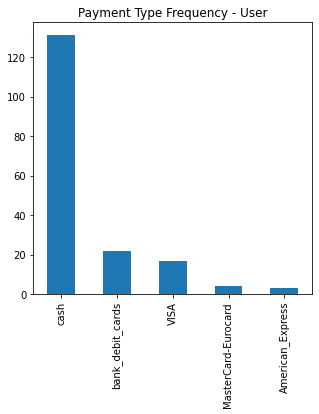

In [190]:
#analyse and process user_payment
dict_data['user_payment']['Upayment'].value_counts().plot.bar(title="Payment Type Frequency - User")
df_user_payment = pd.pivot_table(dict_data['user_payment'].drop_duplicates(),index=['userID'],columns=['Upayment'] ,aggfunc=len).fillna(0)
dict_data['user_payment']['Upayment'].value_counts(normalize=True).cumsum()
df_user_payment = df_user_payment.add_prefix('User_')
df_user_payment

### 4. Impute Missing Values - User Profile Data Set

In [191]:
df_user_profile = dict_data['user_profile'].add_prefix('User_')
df_user_profile.rename(columns={"User_userID": "userID"},inplace=True)
#dispplay missing values
print('MISSING VALUES\n',df_user_profile.isna().sum())
# clean missing values
df_user_profile = df_user_profile.apply(lambda x: x.fillna(x.value_counts().index[0]))
#dispplay missing values
print('\nAFTER CLEANING\n',df_user_profile.isna().sum())
df_user_profile

MISSING VALUES
 userID                    0
User_latitude             0
User_longitude            0
User_smoker               3
User_drink_level          0
User_dress_preference     5
User_ambience             6
User_transport            7
User_marital_status       4
User_hijos               11
User_birth_year           0
User_interest             0
User_personality          0
User_religion             0
User_activity             7
User_color                0
User_weight               0
User_budget               7
User_height               0
dtype: int64

AFTER CLEANING
 userID                   0
User_latitude            0
User_longitude           0
User_smoker              0
User_drink_level         0
User_dress_preference    0
User_ambience            0
User_transport           0
User_marital_status      0
User_hijos               0
User_birth_year          0
User_interest            0
User_personality         0
User_religion            0
User_activity            0
User_color       

userID  User_latitude  User_longitude  User_smoker User_drink_level  \
0    U1001      22.139997     -100.978803        False       abstemious   
1    U1002      22.150087     -100.983325        False       abstemious   
2    U1003      22.119847     -100.946527        False   social drinker   
3    U1004      18.867000      -99.183000        False       abstemious   
4    U1005      22.183477     -100.959891        False       abstemious   
5    U1006      22.150000     -100.983000         True   social drinker   
6    U1007      22.118464     -100.938256        False   casual drinker   
7    U1008      22.122989     -100.923811        False   social drinker   
8    U1009      22.159427     -100.990448        False       abstemious   
9    U1010      22.190889     -100.998669        False   social drinker   
10   U1011      23.724972      -99.152856        False       abstemious   
11   U1012      18.813348      -99.243697        False   casual drinker   
12   U1013      22.174624     -100.993873        False       abstemious   
13   U1014      23.751607      -99.170108        False       abstemious   
14   U1015      22.126760     -100.905209         True   social drinker   
15   U1016      22.156247     -100.977402        False   casual drinker   
16   U1017      18.952615      -99.201616        False   casual drinker   
17   U1018      22.190949     -100.917902         True   casual drinker   
18   U1019      22.153385     -100.975294        False   casual drinker   
19   U1020      18.878189      -99.222969        False       abstemious   
20   U1021      23.730569      -99.171883        False   social drinker   
21   U1022      22.146708     -100.964355        False   casual drinker   
22   U1023      23.752943      -99.166589        False   casual drinker   
23   U1024      22.154021     -100.976028        False       abstemious   
24   U1025      22.125603     -100.907844        False   social drinker   
25   U1026      23.733000      -99.133000        False       abstemious   
26   U1027      22.165150     -100.987015         True   social drinker   
27   U1028      23.752874      -99.169242        False       abstemious   
28   U1029      22.151796     -100.989075         True   casual drinker   
29   U1030      18.844818      -99.182758        False   casual drinker   
30   U1031      23.735698      -99.159851        False       abstemious   
31   U1032      22.169184     -100.986843        False       abstemious   
32   U1033      22.150000     -100.983000        False   social drinker   
33   U1034      22.137178     -101.013169        False   casual drinker   
34   U1035      18.839671      -99.223897         True   casual drinker   
35   U1036      22.160572     -100.989418        False   social drinker   
36   U1037      22.150310     -100.900536        False   social drinker   
37   U1038      22.125786     -100.943705         True   social drinker   
38   U1039      23.738067      -99.139906        False   social drinker   
39   U1040      18.895187      -99.180390        False       abstemious   
40   U1041      18.935191      -99.236240        False       abstemious   
41   U1042      18.925773      -99.219589        False       abstemious   
42   U1043      23.771030      -99.167082        False       abstemious   
43   U1044      18.952980      -99.260789         True   social drinker   
44   U1045      22.156724     -100.984268        False   casual drinker   
45   U1046      22.144415     -100.933097        False   social drinker   
46   U1047      22.142429     -100.949147        False       abstemious   
47   U1048      22.142208     -101.022785         True   casual drinker   
48   U1049      22.150000     -100.983000        False   casual drinker   
49   U1050      23.758815      -99.171216        False   social drinker   
50   U1051      18.877719      -99.222990        False   casual drinker   
51   U1052      22.138055     -100.936005         True   social drinker   
52   U1053      22.175833    

### 5. Join All Tables to Create the Final Model Data Set

In [192]:
df_place_user_ratings = dict_data['ratings'].iloc[: , 1:]

In [193]:
dfs_place = [df_place_user_ratings,df_place_payment,df_place_cuisine,df_place_openhours,df_place_parking,df_place_profile]
dfs_user = [df_user_cuisine,df_user_payment,df_user_profile]
df_join_place = reduce(lambda left,right: pd.merge(left,right,how='left',on='placeID'), dfs_place)
dfs_user = [df_join_place,df_user_cuisine,df_user_payment,df_user_profile]
df_join_final = reduce(lambda left,right: pd.merge(left,right,how='left',on='userID'), dfs_user)
df_join_final

userID  placeID  rating  food_rating  service_rating  general_score  \
0     U1077   135085       2            2               2              6   
1     U1077   135038       2            2               1              5   
2     U1077   132825       2            2               2              6   
3     U1077   135060       1            2               2              5   
4     U1068   135104       1            1               2              4   
5     U1068   132740       0            0               0              0   
6     U1068   132663       1            1               1              3   
7     U1068   132732       0            0               0              0   
8     U1068   132630       1            1               1              3   
9     U1067   132584       2            2               2              6   
10    U1067   132733       1            1               1              3   
11    U1067   132732       1            2               2              5   
12    U1067   132630       1            0               1              2   
13    U1067   135104       0            0               0              0   
14    U1067   132560       1            0               0              1   
15    U1103   132584       1            2               1              4   
16    U1103   132732       0            0               2              2   
17    U1103   132630       1            2               0              3   
18    U1103   132613       2            2               2              6   
19    U1103   132667       1            2               2              5   
20    U1103   135104       1            2               0              3   
21    U1103   132663       1            0               2              3   
22    U1103   132733       2            2               2              6   
23    U1107   132660       2            2               1              5   
24    U1107   132584       2            2               2              6   
25    U1107   132733       2            2               2              6   
26    U1044   135088       2            2               2              6   
27    U1044   132583       1            2               1              4   
28    U1070   132608       2            2               1              5   
29    U1070   132609       1            1               1              3   
30    U1070   132613       1            1               0              2   
31    U1031   132663       0            0               0              0   
32    U1031   132665       0            0               0              0   
33    U1031   132668       0            0               0              0   
34    U1082   132630       1            1               1              3   
35    U1023   132715       0            0               0              0   
36    U1023   132717       0            0               0              0   
37    U1082   132613       0            0               0              0   
38    U1082   132594       0            0               0              0   
39    U1082   132608       0            0               0              0   
40    U1082   132609       0            0               0              0   
41    U1082   132663       0            0               0              0   
42    U1082   132560       0            0               0              0   
43    U1060   132564       2            2               2              6   
44    U1060   132717       2            2               2              6   
45    U1060   132733       2            1               2              5   
46    U1060   132740       1            2               1              4   
47    U1015   135071       0            0               0              0   
48    U1123   132733       1            2               1              4   
49    U1123   132608       1            2               1              4   
50    U1123   135104       2            2               2              6   
51    U1123   132584       1            2            

### 6. Further Input Missing Values and Drop Unwanted Columns - Final Data Set

In [194]:
pd.set_option('display.max_rows',None)
df_join_final.isna().sum()
#drop columns
drop_cols = ['userID','placeID','Place_latitude','Place_longitude','Place_address','Place_the_geom_meter','Place_name', 'Place_city','Place_state','Place_country','Place_fax','Place_zip','Place_url','User_latitude','User_longitude']
df_clean = df_join_final.drop(drop_cols, axis=1)
#replace mising categorical encoded variables with most occurance
df_clean.fillna({'Place_cash':1, 'Place_Mexican':1,'Place_WeekDay':1,'User_cash':1}, inplace=True)
# replace all other categorical encoded variables with 0
df_clean.fillna(0,inplace=True)
df_clean.isna().sum()


rating                        0
food_rating                   0
service_rating                0
general_score                 0
general_score_binary          0
Place_American_Express        0
Place_Carte_Blanche           0
Place_Diners_Club             0
Place_Discover                0
Place_Japan_Credit_Bureau     0
Place_MasterCard-Eurocard     0
Place_VISA                    0
Place_Visa                    0
Place_bank_debit_cards        0
Place_cash                    0
Place_checks                  0
Place_gift_certificates       0
Place_Afghan                  0
Place_African                 0
Place_American                0
Place_Armenian                0
Place_Asian                   0
Place_Bagels                  0
Place_Bakery                  0
Place_Bar                     0
Place_Bar_Pub_Brewery         0
Place_Barbecue                0
Place_Brazilian               0
Place_Breakfast-Brunch        0
Place_Burgers                 0
Place_Cafe-Coffee_Shop        0
Place_Ca

### 7. Categorical Variable Encoding

In [195]:
exp.describe_categorical_variables(df_clean)

variable                                      unique values  \
0           Place_alcohol               No_Alcohol_Served,Full_Bar,Wine-Beer   
1      Place_smoking_area   not permitted,section,none,permitted,only at bar   
2        Place_dress_code                             informal,casual,formal   
3     Place_accessibility              no_accessibility,completely,partially   
4             Place_price                                    medium,low,high   
5         Place_Rambience                                     familiar,quiet   
6         Place_franchise                                                f,t   
7              Place_area                                        closed,open   
8    Place_other_services                              none,variety,Internet   
9        User_drink_level           social drinker,casual drinker,abstemious   
10  User_dress_preference              elegant,informal,no preference,formal   
11          User_ambience                            family,friends,solitary   
12         User_transport                           public,car owner,on foot   
13    User_marital_status                               married,single,widow   
14             User_hijos                         kids,independent,dependent   
15          User_interest         technology,variety,none,eco-friendly,retro   
16       User_personality  thrifty-protector,hard-worker,hunter-ostentati...   
17          User_religion              Catholic,Christian,Jewish,none,Mormon   
18          User_activity      student,professional,unemployed,working-class   
19             User_color    blue,green,orange,white,black,purple,red,yellow   
20            User_budget                                    medium,low,high   

   count unique                top  freq  
0   1161      3  No_Alcohol_Served   762  
1   1161      5               none   636  
2   1161      3           informal  1031  
3   1161      3   no_accessibility   751  
4   1161      3             medium   577  
5   1161      2           familiar  1097  
6   1161      2                  f  1004  
7   1161      2             closed  1034  
8   1161      3               none  1094  
9   1161      3     casual drinker   415  
10  1161      4      no preference   446  
11  1161      3             family   652  
12  1161      3             public   714  
13  1161      3             single  1073  
14  1161      3        independent  1060  
15  1161      5            variety   416  
16  1161      4        hard-worker   550  
17  1161      5           Catholic   865  
18  1161      4            student  1024  
19  1161      8               blue   396  
20  1161      3             medium   803

In [196]:
# one-hot encoding
cols_onehot = ['Place_price','Place_alcohol', 'Place_smoking_area', 'Place_dress_code', 'Place_accessibility',  'Place_other_services', 'User_budget','User_drink_level', 'User_dress_preference', 'User_ambience', 'User_transport', 'User_marital_status', 'User_hijos', 'User_interest', 'User_personality', 'User_religion', 'User_activity', 'User_color',]
onehot_encoder = OneHotEncoder(sparse=False,handle_unknown='ignore')
onehot_df = onehot_encoder.fit_transform(df_clean.loc[:,cols_onehot])
onehot_df = pd.DataFrame(onehot_df, columns=onehot_encoder.get_feature_names(cols_onehot))
df_clean = pd.concat([df_clean, onehot_df], axis=1)
#drop original categorical columns
df_clean = df_clean.drop(cols_onehot, axis=1)

In [197]:
# binary variable encoding
col_ordinal = ['Place_Rambience','Place_franchise','Place_area']
ordinal_encoder = OrdinalEncoder(categories=[['familiar','quiet'],['f','t'],['closed','open']]) 
ordinal_df = ordinal_encoder.fit_transform(df_clean.loc[:,col_ordinal])
df_clean[col_ordinal] = pd.DataFrame(ordinal_df)

### 8. Feature Engineering

In [198]:
#derived fields
df_clean['User_Age'] = 2022 - df_clean['User_birth_year']
df_clean['User_BMI'] = df_clean['User_weight']/df_clean['User_height']
df_clean['User_Healthy'] = np.where((df_clean['User_BMI']>=18) & (df_clean['User_BMI']<=25) , 1, 0)
df_clean['User_Above35'] = np.where((df_clean['User_Age']>=35) , 1, 0)
df_clean = df_clean.drop(['User_birth_year','User_BMI','User_Age','User_height','User_weight'], axis=1)

In [ ]:
# remove columns with no variance
df_clean = df_clean.loc[:, df_clean.apply(pd.Series.nunique) != 1]
df_clean.describe()

In [ ]:
X = df_clean.iloc[:,5:]
y = df_clean['general_score_binary']

poly = PolynomialFeatures(interaction_only=True)
poly_df = poly.fit_transform(X)
original_features = X.columns
X = pd.DataFrame(poly_df, columns=poly.get_feature_names(X.columns))
X = X.loc[:, X.apply(pd.Series.nunique) != 1] # remove variables with no variance

# select best interaction features (running RFE)
interaction_features = [ 
                         'Place_price_medium User_hijos_independent',
                         'Place_smoking_area_none Place_other_services_none',
                         'Place_smoking_area_none User_budget_medium',
                         'Place_dress_code_informal User_budget_medium',
                         'Place_accessibility_no_accessibility User_interest_variety',
                         'User_budget_medium User_drink_level_abstemious',
                         'User_budget_medium User_dress_preference_informal',
                         'User_drink_level_abstemious User_hijos_independent',
                         'User_dress_preference_no preference User_transport_car owner',
                         'User_dress_preference_no preference User_transport_public',
                         'User_dress_preference_no preference User_personality_thrifty-protector',
                         'User_ambience_family User_interest_variety',
                         'User_transport_car owner User_marital_status_single',
                         'User_transport_public User_interest_variety',
                         'User_hijos_independent User_religion_Catholic',
                         'User_hijos_independent User_religion_none']

X  = X[list(original_features)+interaction_features]


### 10. Model Training

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2,shuffle=True)
y_train.value_counts(normalize=True)

#### 10.1 Feature Selection

In [ ]:
est_xgb = xgb.XGBClassifier(objective="binary:logistic"
                   , max_depth=3
#                    , reg_alpha=20
#                    , reg_lambda=20
                   , n_estimators=30
                   , min_child_weight = 10
                   ,use_label_encoder=False
                   ,eval_metric = 'logloss')
selector = RFE(estimator = est_xgb , step=1, n_features_to_select=100)
selector = selector.fit(X_train, y_train)
best_features = selector.support_
best_features

In [ ]:
sel_features = [i for (i, v) in zip(X_train.columns, best_features) if v]
X_train = X_train[sel_features]
X_valid = X_valid[sel_features]
sel_features

#### 10.2 Model Train

In [ ]:
model_xgb_basic = xgb.XGBClassifier(objective="binary:logistic"
                                    , random_state=42
                                    , max_depth=3
                                    , reg_alpha=2
                                    #, reg_lambda=0.5
                                    , n_estimators=50
                                    , min_child_weight = 10
                                    ,eta = 0.2
                                    #,rate_drop=0.1
                                    ,scale_pos_weight = 0.5
                                    ,use_label_encoder=False
                                    ,eval_metric = 'logloss')
#eval_set = [(X_train, y_train), (X_test, y_test)] # 0 represent train and 1 represent test
model_xgb_basic.fit(X_train,y_train)

In [ ]:
# model_xgb_basic = LGBMClassifier(n_estimators=300,max_depth=3, num_leaves=10, learning_rate=0.1, boosting_type='dart')
# model_xgb_basic.fit(X_train,y_train)

In [ ]:
# plt.rcParams['figure.figsize'] = [20, 20]
# modelling.show_feature_importance(model_xgb_basic)

### 11. Model Evaluation

In [ ]:
plt.rcParams['figure.figsize'] = [5, 5]

print ('***********  Training Accuracy ****************')
modelling.show_classification_report(model_xgb_basic,X_train,y_train)
modelling.show_roc_curve(model_xgb_basic,X_train,y_train)

print ('\n\n','***********  Validation Accuracy  ****************')
modelling.show_classification_report(model_xgb_basic,X_valid,y_valid)
modelling.show_roc_curve(model_xgb_basic,X_valid,y_valid)


### 12. Model Interpretaion 

In [ ]:
explainer = shap.TreeExplainer(model_xgb_basic) # model was trained without scaling as interpretaion is simple without scaling
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, features=X_train, feature_names=X_train.columns)

In [ ]:
shap.dependence_plot('User_drink_level_casual drinker',shap_values = shap_values,features = X_train,interaction_index=None)

In [ ]:
shap.dependence_plot('User_budget_medium',shap_values = shap_values,features = X_train,interaction_index=None)

In [ ]:
shap.dependence_plot('User_ambience_friends',shap_values = shap_values,features = X_train,interaction_index=None)